In [1]:
%run StatTest2_WithSimulation_Setup.ipynb

{0: ['ME', 'IL', 'PA', 'GA', 'OK', 'DE', 'WA', 'CT', 'OH', 'VA', 'NE', 'MT', 'IN', 'CA', 'HI', 'ND', 'MD', 'SC', 'RI', 'AK', 'KY', 'WI', 'LA', 'MN', 'MS', 'WV', 'FL'], 1: ['SD', 'IL', 'PA', 'NH', 'NM', 'NV', 'OK', 'UT', 'CT', 'OH', 'VA', 'OR', 'CO', 'IN', 'HI', 'AL', 'RI', 'AK', 'LA', 'MN', 'IA', 'AR', 'WV'], 2: ['MI', 'ME', 'WY', 'DC', 'TX', 'AZ', 'NC', 'WA', 'OR', 'CO', 'MT', 'ND', 'TN', 'SC', 'AL', 'NY', 'KY', 'NJ', 'KS', 'ID', 'IA', 'AR', 'MO'], 3: ['MI', 'SD', 'WY', 'NH', 'DC', 'TX', 'GA', 'AZ', 'NM', 'NC', 'NV', 'DE', 'UT', 'NE', 'CA', 'MD', 'TN', 'NY', 'NJ', 'KS', 'WI', 'ID', 'MS', 'FL', 'MO']}
{0: ['MI', 'SD', 'WY', 'NH', 'DC', 'TX', 'AZ', 'NM', 'NC', 'NV', 'UT', 'OR', 'CO', 'TN', 'AL', 'NY', 'NJ', 'KS', 'ID', 'IA', 'AR', 'MO'], 1: ['MI', 'ME', 'WY', 'DC', 'TX', 'GA', 'AZ', 'NC', 'DE', 'WA', 'NE', 'MT', 'CA', 'ND', 'MD', 'TN', 'SC', 'NY', 'KY', 'NJ', 'KS', 'WI', 'ID', 'MS', 'FL', 'MO'], 2: ['SD', 'IL', 'PA', 'NH', 'GA', 'NM', 'NV', 'OK', 'DE', 'UT', 'CT', 'OH', 'VA', 'NE', 'IN'

In [2]:
data2014 = pd.read_csv("Our_Dataset/2014dataset.csv")
data2015 = pd.read_csv("Our_Dataset/2015dataset.csv")
data2016 = pd.read_csv("Our_Dataset/2016dataset.csv")
data2017 = pd.read_csv("Our_Dataset/2017dataset.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,52,323,649,882,932,1092,1202) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,57,204,341,376,377,396,430,431,928,944,1006,1013,1151,1160,1169,1179,1411) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,17,163,355,406,702,835,847,1083,1156,1183,1185,1200) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Create the labels.
# By index:
# label 2 is transfers
# label 3 is premiums
# label 4 is costs
# label 5 is member months
# label 6 is reinsurance (individual group only)

ind_labels_14 = ["HIOS ID", "HIOS INPUTTED INSURANCE COMPANY NAME",
                  "HHS RISK ADJUSTMENT TRANSFER AMOUNT (INDIVIDUAL MARKET, INCLUDING CATASTROPHIC)",
                  "1.1Directpremiumwritten2HealthInsuranceINDIVIDUALTotalasof3/31/15",
                  "2.16Totalincurredclaims2HealthInsuranceINDIVIDUALTotalasof3/31/15",
                  "7.4Membermonths2HealthInsuranceINDIVIDUALTotalasof3/31/15",
                  "STATE", "REINSURANCE PAYMENT AMOUNT (OR NOT ELIGIBLE)"] # no more reinsurance as of 2017
ind_labels_15 = [label.replace('15', '16') for label in ind_labels_14]
ind_labels_16 = [label.replace('15', '17') for label in ind_labels_14]
ind_labels_17 = [label.replace('15', '18') for label in ind_labels_14][:-1]

sg_labels_14 = ["HIOS ID", "HIOS INPUTTED INSURANCE COMPANY NAME",
                 "HHS RISK ADJUSTMENT TRANSFERS AMOUNT (SMALL GROUP MARKET)",
                  "1.1Directpremiumwritten7HealthInsuranceSMALLGROUPTotalasof3/31/15",
                  "2.16Totalincurredclaims7HealthInsuranceSMALLGROUPTotalasof3/31/15",
                  "7.4Membermonths7HealthInsuranceSMALLGROUPTotalasof3/31/15", "STATE"]
sg_labels_15 = [label.replace('15', '16') for label in sg_labels_14]
sg_labels_16 = [label.replace('15', '17') for label in sg_labels_14]
sg_labels_17 = [label.replace('15', '18') for label in sg_labels_14]

In [4]:
# Filter the data to include only the fields we want

ind_data_14 = data2014[ind_labels_14].dropna()
ind_data_15 = data2015[ind_labels_15].dropna()
ind_data_16 = data2016[ind_labels_16].dropna()
ind_data_17 = data2017[ind_labels_17].dropna()
sg_data_14 = data2014[sg_labels_14].dropna()
sg_data_15 = data2015[sg_labels_15].dropna()
sg_data_16 = data2016[sg_labels_16].dropna()
sg_data_17 = data2017[sg_labels_17].dropna()

In [5]:
# Drop companies with <2000 MM
ind_data_14 = ind_data_14.where(ind_data_14[ind_labels_14[5]] > 2000).dropna()
ind_data_15 = ind_data_15.where(ind_data_15[ind_labels_15[5]] > 2000).dropna()
ind_data_16 = ind_data_16.where(ind_data_16[ind_labels_16[5]] > 2000).dropna()
ind_data_17 = ind_data_17.where(ind_data_17[ind_labels_17[5]] > 2000).dropna()
sg_data_14 = sg_data_14.where(sg_data_14[sg_labels_14[5]] > 2000).dropna()
sg_data_15 = sg_data_15.where(sg_data_15[sg_labels_15[5]] > 2000).dropna()
sg_data_16 = sg_data_16.where(sg_data_16[sg_labels_16[5]] > 2000).dropna()
sg_data_17 = sg_data_17.where(sg_data_17[sg_labels_17[5]] > 2000).dropna()

In [6]:
# Calculate transfers, premiums, costs, and reinsurance (if individual group) per member month
def calculate_pmm(df, df_labels, group):
    df["MM"] = df[df_labels[5]]
    df["Transfers"] = df[df_labels[2]]
    df["TotalCosts"] = abs(df[df_labels[4]])
    df["Enrollees"] = df["MM"] / 12
    df["TransfersPerEnrollee"] = df["Transfers"] / df["Enrollees"]
    df["TransfersPerSqrtEnrollee"] = df["Transfers"] / np.sqrt(df["Enrollees"])
    df["LogEnrollees"] = np.log(df["Enrollees"])
    df["LogTransfers"] = np.log(df["Transfers"]**2 + 1)
    df["TransfersPMM"] = df[df_labels[2]] / df[df_labels[5]]
    df["PremiumsPMM"] = abs(df[df_labels[3]] / df[df_labels[5]])
    df["CostsPMM"] = abs(df[df_labels[4]] / df[df_labels[5]])
    if group == "i":
        df["ReinsurancePMM"] = df[df_labels[7]] / df[df_labels[5]]
        df["ProfitsPMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["TransfersPMM"] + df["ReinsurancePMM"]
        #df["PremMinusCostsPlusReinsurancePMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["ReinsurancePMM"]
    elif group == "sg":
        df["ProfitsPMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["TransfersPMM"]
    df["PremMinusCostsPMM"] = df["PremiumsPMM"] - df["CostsPMM"]
    df["PremMinusCostsPlusTransfersPMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["TransfersPMM"]
    df["SicknessPMM"] = df["CostsPMM"] - df["PremiumsPMM"]
    average_sickness = np.mean(df["SicknessPMM"])
    df["ExcessSicknessPMM"] = df["SicknessPMM"] - average_sickness
    return df

ind_data_14 = calculate_pmm(ind_data_14, ind_labels_14, "i")
ind_data_15 = calculate_pmm(ind_data_15, ind_labels_15, "i")
ind_data_16 = calculate_pmm(ind_data_16, ind_labels_16, "i")
ind_data_17 = calculate_pmm(ind_data_17, ind_labels_17, "sg")
sg_data_14 = calculate_pmm(sg_data_14, sg_labels_14, "sg")
sg_data_15 = calculate_pmm(sg_data_15, sg_labels_15, "sg")
sg_data_16 = calculate_pmm(sg_data_16, sg_labels_16, "sg")
sg_data_17 = calculate_pmm(sg_data_17, sg_labels_17, "sg")

In [7]:
# Combine the dataframes by left merging

ind_data = ind_data_14.merge(ind_data_15, on='HIOS ID', how='outer', suffixes=('_14', '_15'))\
.merge(ind_data_16, on='HIOS ID', how='outer').merge(ind_data_17, on='HIOS ID', how='outer', suffixes=('_16', '_17'))

In [8]:
# Do the same thing for small group

sg_data = sg_data_14.merge(sg_data_15, on='HIOS ID', how='outer', suffixes=('_14', '_15'))\
.merge(sg_data_16, on='HIOS ID', how='outer').merge(sg_data_17, on='HIOS ID', how='outer', suffixes=('_16', '_17'))

In [9]:
states = list(set(sg_data_14["STATE"]))
dfs = [sg_data_14, sg_data_15, sg_data_16, sg_data_17]
print_label = "All States"

In [10]:
dfs_new = normalize_empirical_data_to_avg_2017_dollars(dfs, states)

Cbar is 4398.953
IA 14 Ratio is 1.318
AR 14 Ratio is 1.473
CO 14 Ratio is 1.203
ME 14 Ratio is 1.188
AK 14 Ratio is 0.763
LA 14 Ratio is 1.184
KS 14 Ratio is 1.392
MT 14 Ratio is 1.184
OH 14 Ratio is 1.264
WV 14 Ratio is 1.032
MN 14 Ratio is 1.182
SC 14 Ratio is 1.115
TX 14 Ratio is 1.184
MD 14 Ratio is 1.238
UT 14 Ratio is 1.628
DE 14 Ratio is 1.153
KY 14 Ratio is 1.389
WY 14 Ratio is 1.016
HI 14 Ratio is 1.175
IL 14 Ratio is 1.083
NY 14 Ratio is 0.973
WI 14 Ratio is 1.127
NV 14 Ratio is 1.365
SD 14 Ratio is 1.155
NC 14 Ratio is 1.254
MO 14 Ratio is 1.414
CT 14 Ratio is 0.990
VA 14 Ratio is 1.250
CA 14 Ratio is 1.154
GA 14 Ratio is 1.260
NH 14 Ratio is 1.061
TN 14 Ratio is 1.447
WA 14 Ratio is 1.199
MS 14 Ratio is 1.361
ND 14 Ratio is 1.202
NE 14 Ratio is 1.265
OR 14 Ratio is 1.208
AZ 14 Ratio is 1.497
MI 14 Ratio is 1.308
ID 14 Ratio is 1.484
DC 14 Ratio is 1.139
PA 14 Ratio is 1.105
NJ 14 Ratio is 1.173
FL 14 Ratio is 1.199
NM 14 Ratio is 1.142
AL 14 Ratio is 1.156
OK 14 Ratio is 1.

In [11]:
for df_temp in dfs_new:
    df_temp["TransfersNormalizedPerSqrtEnrollee"] = df_temp["TransfersNormalized"] / np.sqrt(df_temp["Enrollees"])

In [12]:
#dfs_new[3][["TransfersPerSqrtEnrollee", "TransfersNormalizedPerSqrtEnrollee"]]

In [13]:
df2 = create_df2(states, dfs_new, "TransfersNormalizedPerSqrtEnrollee")


In [14]:
k = len(df2)
v = np.linspace(0, max(abs(df2)), 10000)
v = v[1:len(v)]

ratios = [ratio_list(df2, vi) for vi in v]
#print(ratios)
begin_p = 5/k
end_p = 1-begin_p
start_index = 0
end_index = 0
for index, ratio2 in enumerate(ratios):
    if ratio2 >= begin_p:
        start_index = index
        break
    
for index, ratio2 in enumerate(ratios):
    if ratio2 > end_p:
        end_index = index
        break

if end_index == 0:
    end_index = len(v) - 1
    
v = v[start_index:end_index]

ratios2 = ratios[start_index:end_index]
multiplier = [np.sqrt(2)/vi for vi in v]
#plt.plot(v, ratios2)
#plt.plot(v, multiplier)

In [15]:
y = [multiplier[i] * special.erfinv(ratio2) for i, ratio2 in enumerate(ratios2)]
#plt.plot(v, y)
#plt.title("1/beta vs. v")
beta = [1/yi for yi in y]
#plt.plot(v, beta)
#plt.axvline(x=64432.69, color='r', linestyle='--', label="Point of max difference")
#plt.title("beta vs. v")

In [16]:
# Finding the minimum beta
# Whenever we reject a beta, we reject all betas greater than that,
# so keep pushing beta smaller until we reach max_difference == test_statistic
# Run test for larger data sizes (combining states, years)

In [17]:
max_beta=max(beta)
max_beta = int(max_beta/100)*100

beta = 115100.000


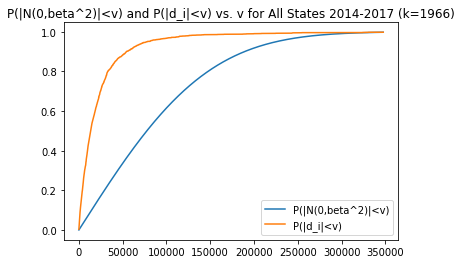

In [18]:
theoretical = [special.erf(vi/(max_beta*np.sqrt(2))) for vi in v]

plt.plot(v, theoretical, label="P(|N(0,beta^2)|<v)")
plt.plot(v, ratios2, label="P(|d_i|<v)")
plt.title("P(|N(0,beta^2)|<v) and P(|d_i|<v) vs. v for %s 2014-2017 (k=%d)" % (print_label, len(df2)))
#plt.axvline(x=64432.69, color='r', linestyle='--', label="Point of max difference")
plt.legend()
print("beta = %.3f" % (max_beta))

In [19]:
beta_theoretical, Mb_index = run_test_against_theoretical(df2, max_beta, ratios2, False)

k = 1966
test_stat at this k = 0.02752

At the point of maximum difference with beta = 115100:
P(|d_i|<v) = 0.7986
P(|N(0,max_beta^2)|<v) = 0.2243
Difference = 0.5743




At the point of maximum difference with beta = 105100:
P(|d_i|<v) = 0.7986
P(|N(0,max_beta^2)|<v) = 0.2450
Difference = 0.5536




At the point of maximum difference with beta = 95100:
P(|d_i|<v) = 0.7986
P(|N(0,max_beta^2)|<v) = 0.2698
Difference = 0.5288




At the point of maximum difference with beta = 85100:
P(|d_i|<v) = 0.7986
P(|N(0,max_beta^2)|<v) = 0.3001
Difference = 0.4985




At the point of maximum difference with beta = 75100:
P(|d_i|<v) = 0.7925
P(|N(0,max_beta^2)|<v) = 0.3315
Difference = 0.4609




At the point of maximum difference with beta = 65100:
P(|d_i|<v) = 0.7925
P(|N(0,max_beta^2)|<v) = 0.3787
Difference = 0.4138




At the point of maximum difference with beta = 55100:
P(|d_i|<v) = 0.7269
P(|N(0,max_beta^2)|<v) = 0.3686
Difference = 0.3582




At the point of maximum difference with beta = 4


At the point of maximum difference with beta = 19600:
P(|d_i|<v) = 0.2686
P(|N(0,max_beta^2)|<v) = 0.2253
Difference = 0.0432




At the point of maximum difference with beta = 19500:
P(|d_i|<v) = 0.2686
P(|N(0,max_beta^2)|<v) = 0.2265
Difference = 0.0421




At the point of maximum difference with beta = 19400:
P(|d_i|<v) = 0.2686
P(|N(0,max_beta^2)|<v) = 0.2276
Difference = 0.0410




At the point of maximum difference with beta = 19300:
P(|d_i|<v) = 0.2686
P(|N(0,max_beta^2)|<v) = 0.2287
Difference = 0.0398




At the point of maximum difference with beta = 19200:
P(|d_i|<v) = 0.1348
P(|N(0,max_beta^2)|<v) = 0.0959
Difference = 0.0389




At the point of maximum difference with beta = 19100:
P(|d_i|<v) = 0.1348
P(|N(0,max_beta^2)|<v) = 0.0964
Difference = 0.0384




At the point of maximum difference with beta = 19000:
P(|d_i|<v) = 0.1348
P(|N(0,max_beta^2)|<v) = 0.0969
Difference = 0.0379




At the point of maximum difference with beta = 18900:
P(|d_i|<v) = 0.1348
P(|N(0,max_beta

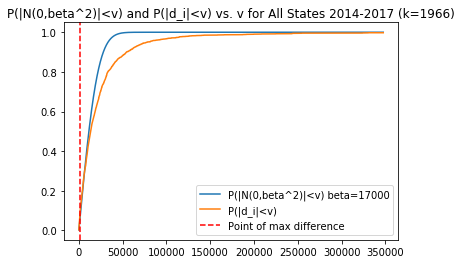

In [20]:
beta_theoretical = beta_theoretical+100

theoretical = [special.erf(vi/(beta_theoretical*np.sqrt(2))) for vi in v]

plt.plot(v, theoretical, label="P(|N(0,beta^2)|<v) beta=%d" % (beta_theoretical))
plt.plot(v, ratios2, label="P(|d_i|<v)")
plt.title("P(|N(0,beta^2)|<v) and P(|d_i|<v) vs. v for %s 2014-2017 (k=%d)" % (print_label, len(df2)))
plt.axvline(x=v[Mb_index], color='r', linestyle='--', label="Point of max difference")
plt.legend()
#plt.xlim(0, 50000)
#print("beta = %.3f" % (max_beta))

In [21]:
print("Theoretical Test Results")
run_binom_stat_test2(beta_theoretical, df2.values)

Theoretical Test Results
Beta (=std): 17000
Number of T/sqrt(n) above 2 stds: 381
Proportion of T/sqrt(n) above 2 stds: 0.194
P value = 0.000000


In [22]:
ratios_c, _ = create_simulation_adjust_for_imbalances(states, dfs_new, beta_theoretical - 10000)
ratios_c2, _ = create_simulation_adjust_for_imbalances(states, dfs_new, beta_theoretical)
ratios_c3, _ = create_simulation_adjust_for_imbalances(states, dfs_new, beta_theoretical + 10000)

Sum sqrt(a) = 205454.441
Sum sqrt(a) = 205454.441
Sum sqrt(a) = 205454.441


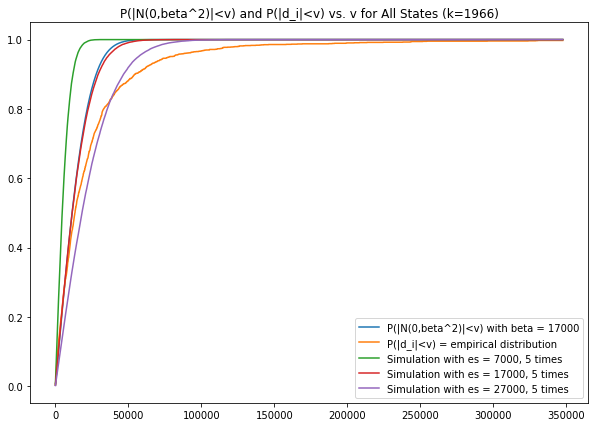

In [23]:
theoretical = [special.erf(vi/(beta_theoretical*np.sqrt(2))) for vi in v]

plt.figure(figsize=(10, 7))
plt.plot(v, theoretical, label="P(|N(0,beta^2)|<v) with beta = %d" % (beta_theoretical))
plt.plot(v, ratios2, label="P(|d_i|<v) = empirical distribution")
plt.plot(v, ratios_c, label="Simulation with es = %d, 5 times" % (beta_theoretical - 10000))
plt.plot(v, ratios_c2, label="Simulation with es = %d, 5 times" % (beta_theoretical))
plt.plot(v, ratios_c3, label="Simulation with es = %d, 5 times" % (beta_theoretical + 10000))
plt.title("P(|N(0,beta^2)|<v) and P(|d_i|<v) vs. v for %s (k=%d)" % (print_label, len(df2)))
plt.legend()

In [24]:
beta_sims = list()

for i in range(5):
    beta_sim, _= run_test_against_simulation(states, dfs_new, beta_theoretical, ratios2, False)
    beta_sims.append(beta_sim)

k = 1966
test_stat at this k = 0.02752

At the point of maximum difference with beta = 21000:
P(|d_i|<v) = 0.2686
P(|N(0,max_beta^2)|<v) = 0.2020
Difference = 0.0666




At the point of maximum difference with beta = 20900:
P(|d_i|<v) = 0.2686
P(|N(0,max_beta^2)|<v) = 0.2074
Difference = 0.0612




At the point of maximum difference with beta = 20800:
P(|d_i|<v) = 0.2686
P(|N(0,max_beta^2)|<v) = 0.2068
Difference = 0.0618




At the point of maximum difference with beta = 20700:
P(|d_i|<v) = 0.2686
P(|N(0,max_beta^2)|<v) = 0.2062
Difference = 0.0624




At the point of maximum difference with beta = 20600:
P(|d_i|<v) = 0.2686
P(|N(0,max_beta^2)|<v) = 0.2087
Difference = 0.0599




At the point of maximum difference with beta = 20500:
P(|d_i|<v) = 0.2686
P(|N(0,max_beta^2)|<v) = 0.2101
Difference = 0.0585




At the point of maximum difference with beta = 20400:
P(|d_i|<v) = 0.2686
P(|N(0,max_beta^2)|<v) = 0.2142
Difference = 0.0544




At the point of maximum difference with beta = 203


At the point of maximum difference with beta = 18600:
P(|d_i|<v) = 0.1348
P(|N(0,max_beta^2)|<v) = 0.0993
Difference = 0.0355




At the point of maximum difference with beta = 18500:
P(|d_i|<v) = 0.1348
P(|N(0,max_beta^2)|<v) = 0.0981
Difference = 0.0367




At the point of maximum difference with beta = 18400:
P(|d_i|<v) = 0.2686
P(|N(0,max_beta^2)|<v) = 0.2359
Difference = 0.0327




At the point of maximum difference with beta = 18300:
P(|d_i|<v) = 0.1348
P(|N(0,max_beta^2)|<v) = 0.0999
Difference = 0.0349




At the point of maximum difference with beta = 18200:
P(|d_i|<v) = 0.1348
P(|N(0,max_beta^2)|<v) = 0.0979
Difference = 0.0369




At the point of maximum difference with beta = 18100:
P(|d_i|<v) = 0.1348
P(|N(0,max_beta^2)|<v) = 0.1000
Difference = 0.0348




At the point of maximum difference with beta = 18000:
P(|d_i|<v) = 0.1089
P(|N(0,max_beta^2)|<v) = 0.0733
Difference = 0.0355




At the point of maximum difference with beta = 17900:
P(|d_i|<v) = 0.1348
P(|N(0,max_beta


At the point of maximum difference with beta = 20900:
P(|d_i|<v) = 0.2686
P(|N(0,max_beta^2)|<v) = 0.2073
Difference = 0.0612




At the point of maximum difference with beta = 20800:
P(|d_i|<v) = 0.2686
P(|N(0,max_beta^2)|<v) = 0.2053
Difference = 0.0633




At the point of maximum difference with beta = 20700:
P(|d_i|<v) = 0.2686
P(|N(0,max_beta^2)|<v) = 0.2063
Difference = 0.0623




At the point of maximum difference with beta = 20600:
P(|d_i|<v) = 0.2686
P(|N(0,max_beta^2)|<v) = 0.2105
Difference = 0.0581




At the point of maximum difference with beta = 20500:
P(|d_i|<v) = 0.2686
P(|N(0,max_beta^2)|<v) = 0.2141
Difference = 0.0545




At the point of maximum difference with beta = 20400:
P(|d_i|<v) = 0.2686
P(|N(0,max_beta^2)|<v) = 0.2088
Difference = 0.0597




At the point of maximum difference with beta = 20300:
P(|d_i|<v) = 0.2686
P(|N(0,max_beta^2)|<v) = 0.2155
Difference = 0.0530




At the point of maximum difference with beta = 20200:
P(|d_i|<v) = 0.2782
P(|N(0,max_beta


At the point of maximum difference with beta = 18500:
P(|d_i|<v) = 0.2686
P(|N(0,max_beta^2)|<v) = 0.2293
Difference = 0.0393




At the point of maximum difference with beta = 18400:
P(|d_i|<v) = 0.1089
P(|N(0,max_beta^2)|<v) = 0.0721
Difference = 0.0368




At the point of maximum difference with beta = 18300:
P(|d_i|<v) = 0.2686
P(|N(0,max_beta^2)|<v) = 0.2314
Difference = 0.0371




At the point of maximum difference with beta = 18200:
P(|d_i|<v) = 0.1348
P(|N(0,max_beta^2)|<v) = 0.1021
Difference = 0.0327




At the point of maximum difference with beta = 18100:
P(|d_i|<v) = 0.1348
P(|N(0,max_beta^2)|<v) = 0.1031
Difference = 0.0317




At the point of maximum difference with beta = 18000:
P(|d_i|<v) = 0.1348
P(|N(0,max_beta^2)|<v) = 0.1009
Difference = 0.0339




At the point of maximum difference with beta = 17900:
P(|d_i|<v) = 0.1348
P(|N(0,max_beta^2)|<v) = 0.1011
Difference = 0.0337




At the point of maximum difference with beta = 17800:
P(|d_i|<v) = 0.1348
P(|N(0,max_beta

In [25]:
print("Simulation without Adjustment Test Results")
run_binom_stat_test2(np.mean(beta_sims), df2.values)
run_binom_stat_test3(np.mean(beta_sims), df2.values)

Simulation without Adjustment Test Results
Beta (=std): 16960
Number of T/sqrt(n) above 2 stds: 381
Proportion of T/sqrt(n) above 2 stds: 0.194
P value = 0.000000
Beta (=std): 16960
Number of T/sqrt(n) above 3 stds: 225
Proportion of T/sqrt(n) above 3 stds: 0.114
P value = 0.000000


In [26]:
beta_sim_adjs = list()

for i in range(5):
    beta_sim_adj, _= run_test_against_simulation_adjust_for_imbalances(states, dfs_new,
                                                                   beta_theoretical, ratios2, False)
    beta_sim_adjs.append(beta_sim_adj)

k = 1966
test_stat at this k = 0.02752
Sum sqrt(a) = 205454.441

At the point of maximum difference with beta = 21000:
P(|d_i|<v) = 0.2686
P(|N(0,max_beta^2)|<v) = 0.2150
Difference = 0.0536



Sum sqrt(a) = 205454.441

At the point of maximum difference with beta = 20900:
P(|d_i|<v) = 0.2660
P(|N(0,max_beta^2)|<v) = 0.2129
Difference = 0.0532



Sum sqrt(a) = 205454.441

At the point of maximum difference with beta = 20800:
P(|d_i|<v) = 0.2686
P(|N(0,max_beta^2)|<v) = 0.2188
Difference = 0.0497



Sum sqrt(a) = 205454.441

At the point of maximum difference with beta = 20700:
P(|d_i|<v) = 0.2686
P(|N(0,max_beta^2)|<v) = 0.2163
Difference = 0.0523



Sum sqrt(a) = 205454.441

At the point of maximum difference with beta = 20600:
P(|d_i|<v) = 0.2686
P(|N(0,max_beta^2)|<v) = 0.2186
Difference = 0.0499



Sum sqrt(a) = 205454.441

At the point of maximum difference with beta = 20500:
P(|d_i|<v) = 0.2660
P(|N(0,max_beta^2)|<v) = 0.2185
Difference = 0.0475



Sum sqrt(a) = 205454.441

At th

Sum sqrt(a) = 205454.441

At the point of maximum difference with beta = 19000:
P(|d_i|<v) = 0.1348
P(|N(0,max_beta^2)|<v) = 0.0985
Difference = 0.0363



Sum sqrt(a) = 205454.441

At the point of maximum difference with beta = 18900:
P(|d_i|<v) = 0.1348
P(|N(0,max_beta^2)|<v) = 0.1016
Difference = 0.0332



Sum sqrt(a) = 205454.441

At the point of maximum difference with beta = 18800:
P(|d_i|<v) = 0.1348
P(|N(0,max_beta^2)|<v) = 0.1012
Difference = 0.0336



Sum sqrt(a) = 205454.441

At the point of maximum difference with beta = 18700:
P(|d_i|<v) = 0.1089
P(|N(0,max_beta^2)|<v) = 0.0801
Difference = 0.0288



Sum sqrt(a) = 205454.441

At the point of maximum difference with beta = 18600:
P(|d_i|<v) = 0.1348
P(|N(0,max_beta^2)|<v) = 0.1014
Difference = 0.0334



Sum sqrt(a) = 205454.441

At the point of maximum difference with beta = 18500:
P(|d_i|<v) = 0.1089
P(|N(0,max_beta^2)|<v) = 0.0788
Difference = 0.0300



Sum sqrt(a) = 205454.441

At the point of maximum difference with beta

Sum sqrt(a) = 205454.441

At the point of maximum difference with beta = 20700:
P(|d_i|<v) = 0.2686
P(|N(0,max_beta^2)|<v) = 0.2153
Difference = 0.0532



Sum sqrt(a) = 205454.441

At the point of maximum difference with beta = 20600:
P(|d_i|<v) = 0.2686
P(|N(0,max_beta^2)|<v) = 0.2151
Difference = 0.0534



Sum sqrt(a) = 205454.441

At the point of maximum difference with beta = 20500:
P(|d_i|<v) = 0.2686
P(|N(0,max_beta^2)|<v) = 0.2226
Difference = 0.0459



Sum sqrt(a) = 205454.441

At the point of maximum difference with beta = 20400:
P(|d_i|<v) = 0.2686
P(|N(0,max_beta^2)|<v) = 0.2224
Difference = 0.0461



Sum sqrt(a) = 205454.441

At the point of maximum difference with beta = 20300:
P(|d_i|<v) = 0.2686
P(|N(0,max_beta^2)|<v) = 0.2252
Difference = 0.0434



Sum sqrt(a) = 205454.441

At the point of maximum difference with beta = 20200:
P(|d_i|<v) = 0.2660
P(|N(0,max_beta^2)|<v) = 0.2219
Difference = 0.0441



Sum sqrt(a) = 205454.441

At the point of maximum difference with beta

Sum sqrt(a) = 205454.441

At the point of maximum difference with beta = 18800:
P(|d_i|<v) = 0.1348
P(|N(0,max_beta^2)|<v) = 0.1021
Difference = 0.0327



Sum sqrt(a) = 205454.441

At the point of maximum difference with beta = 18700:
P(|d_i|<v) = 0.1348
P(|N(0,max_beta^2)|<v) = 0.1002
Difference = 0.0346



Sum sqrt(a) = 205454.441

At the point of maximum difference with beta = 18600:
P(|d_i|<v) = 0.1348
P(|N(0,max_beta^2)|<v) = 0.1019
Difference = 0.0329



Sum sqrt(a) = 205454.441

At the point of maximum difference with beta = 18500:
P(|d_i|<v) = 0.1089
P(|N(0,max_beta^2)|<v) = 0.0742
Difference = 0.0346



Sum sqrt(a) = 205454.441

At the point of maximum difference with beta = 18400:
P(|d_i|<v) = 0.1348
P(|N(0,max_beta^2)|<v) = 0.1011
Difference = 0.0337



Sum sqrt(a) = 205454.441

At the point of maximum difference with beta = 18300:
P(|d_i|<v) = 0.1348
P(|N(0,max_beta^2)|<v) = 0.1009
Difference = 0.0339



Sum sqrt(a) = 205454.441

At the point of maximum difference with beta

In [27]:
print("Simulation WITH Adjustment Test Results")
run_binom_stat_test2(np.mean(beta_sim_adjs), df2.values)
run_binom_stat_test3(np.mean(beta_sim_adjs), df2.values)

Simulation WITH Adjustment Test Results
Beta (=std): 17700
Number of T/sqrt(n) above 2 stds: 371
Proportion of T/sqrt(n) above 2 stds: 0.189
P value = 0.000000
Beta (=std): 17700
Number of T/sqrt(n) above 3 stds: 208
Proportion of T/sqrt(n) above 3 stds: 0.106
P value = 0.000000


In [28]:
print("Theoretical Test Results")
run_binom_stat_test2(beta_theoretical, df2.values)
run_binom_stat_test3(beta_theoretical, df2.values)
print("\n")
print("Simulation without Adjustment Test Results")
run_binom_stat_test2(np.mean(beta_sims), df2.values)
run_binom_stat_test3(np.mean(beta_sims), df2.values)
print("\n")
print("Simulation WITH Adjustment Test Results")
run_binom_stat_test2(np.mean(beta_sim_adjs), df2.values)
run_binom_stat_test3(np.mean(beta_sim_adjs), df2.values)

Theoretical Test Results
Beta (=std): 17000
Number of T/sqrt(n) above 2 stds: 381
Proportion of T/sqrt(n) above 2 stds: 0.194
P value = 0.000000
Beta (=std): 17000
Number of T/sqrt(n) above 3 stds: 223
Proportion of T/sqrt(n) above 3 stds: 0.113
P value = 0.000000


Simulation without Adjustment Test Results
Beta (=std): 16960
Number of T/sqrt(n) above 2 stds: 381
Proportion of T/sqrt(n) above 2 stds: 0.194
P value = 0.000000
Beta (=std): 16960
Number of T/sqrt(n) above 3 stds: 225
Proportion of T/sqrt(n) above 3 stds: 0.114
P value = 0.000000


Simulation WITH Adjustment Test Results
Beta (=std): 17700
Number of T/sqrt(n) above 2 stds: 371
Proportion of T/sqrt(n) above 2 stds: 0.189
P value = 0.000000
Beta (=std): 17700
Number of T/sqrt(n) above 3 stds: 208
Proportion of T/sqrt(n) above 3 stds: 0.106
P value = 0.000000
